Descriptive Statistics Final Project
========
[Source](https://docs.google.com/document/d/1059JMJ9C5dn7vKUrmfWYle57Ai3Uk9PzxPQBGj5drjE/pub)

## Overview

Welcome to the Descriptive Statistics Final Project! In this project, you will demonstrate what you have learned in this course by conducting an experiment dealing with drawing from a deck of playing cards and creating a writeup containing your findings.
Be sure to check through the project rubric to self-assess and share with others who will give you feedback.

## Questions for Investigation

This experiment will require the use of a standard deck of playing cards. This is a deck of fifty-two cards divided into four suits (spades (♠), hearts (<font color="red">♥</font>), diamonds (<font color="red">♦</font>), and clubs (♣)), each suit containing thirteen cards (Ace, numbers 2-10, and face cards Jack, Queen, and King). You can use either a physical deck of cards for this experiment or you may use a virtual deck of cards such as that found on random.org (http://www.random.org/playing-cards/).
For the purposes of this task, assign each card a value: The Ace takes a value of 1, numbered cards take the value printed on the card, and the Jack, Queen, and King each take a value of 10.
1. First, create a histogram depicting the relative frequencies of the card values.
2. Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Repeat this sampling procedure a total of at least thirty times.
3. Let’s take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.
4. Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?
5. Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

## Load the libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('seaborn-colorblind')

## Create card deck

In [2]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q'] 
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

## 1. Create a histogram depicting the relative frequencies of the card values

First, create a histogram depicting the relative frequencies of the card values.

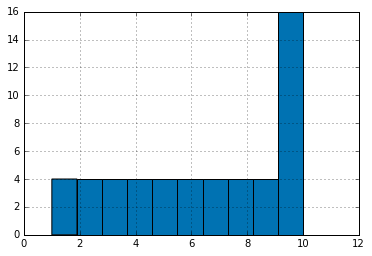

In [3]:
deck.hist()

## 2. Get samples for a new distribution

Now, we will get samples for a new distribution. To obtain a single sample, shuffle your deck of cards and draw three cards from it. (You will be sampling from the deck without replacement.) Record the cards that you have drawn and the sum of the three cards’ values. Repeat this sampling procedure a total of at least thirty times.

In [4]:
samples = []
for i in range(5000):
    samples.append(np.random.choice(deck,3, replace=False).sum())
    
samples = pd.Series(samples)

## 3. Report descriptive statistics for the samples

Let’s take a look at the distribution of the card sums. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.

In [5]:
samples.describe()

count    5000.000000
mean       19.598200
std         5.386108
min         4.000000
25%        16.000000
50%        20.000000
75%        23.000000
max        30.000000
dtype: float64

## 4. Create a histogram of the sampled card sums you have recorded

Create a histogram of the sampled card sums you have recorded. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

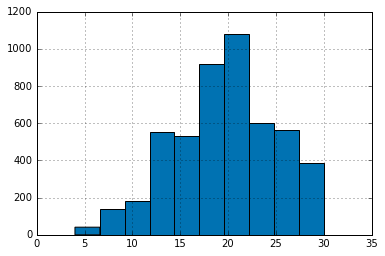

In [6]:
samples.hist()

## 5. Make some estimates about values you will get on future draws

Make some estimates about values you will get on future draws. Within what range will you expect approximately 90% of your draw values to fall? What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values.

### a. Within what range will you expect approximately 90% of your draw values to fall?

In [7]:
samples.quantile(q=[.05,.95])

0.05    10.0
0.95    28.0
dtype: float64

### b. Approximate probability that you will get a draw value of at least 20?

Calculate the z score 

$Z=\frac{X-\mu}{\sigma}$

In [8]:
z = (20-samples.mean())/samples.std()
z

0.07459932183438289

We could lookup the value in the [Z score table](https://s3.amazonaws.com/udacity-hosted-downloads/ZTable.jpg), but I want to calculate it.

Convert the Z score to a p-value with the Survival function (also defined as 1 - cdf (Cumulative Distribution Function), but sf is sometimes more accurate).

$S(t)=P(\{T>t\})=\int _{t}^{\infty }f(u)\,du=1-F(t)$

In [9]:
sf = stats.norm.sf(z)
print(sf)

0.47026675686


As we can see the probability that we will get a draw value of at least 20 is 0.470.